## Lab 4 – Predicting a Continuous Target with Regression

We will evaluate performance using key regression metrics and create visualizations to interpret the results.

Linear Regression Model

    First, we'll predict weight based on height.
    Then, we'll add a second feature (age) to predict weight.

Polynomial Regression Model

    We'll extend the linear model by adding higher-order terms to capture more complex relationships.

Regularized Model (Elastic Net)

    We'll apply regularization to prevent overfitting and improve generalization.

In [1]:
# imports at the top of the file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

## Section 1. Load and Explore the Data
### 1.1 Load the dataset

In [2]:
# Load Howell.csv from the same folder as this file

howell_full = pd.read_csv("Howell.csv", sep=";")

### 1.2 Explore the Dataset Structure

In [3]:
# Display basic information about the dataset
print("Dataset shape:", howell_full.shape)
print("\nColumn names:")
print(howell_full.columns.tolist())
print("\nFirst few rows:")
print(howell_full.head())
print("\nDataset info:")
print(howell_full.info())

# Check for missing data
print("\nMissing data in dataset:")
missing_data = howell_full.isnull().sum()
print(missing_data)

if missing_data.sum() == 0:
    print("\n✓ No missing data found in the dataset!")
else:
    print(f"\n⚠️ Found {missing_data.sum()} missing values total")

Dataset shape: (544, 4)

Column names:
['height', 'weight', 'age', 'male']

First few rows:
    height     weight   age  male
0  151.765  47.825606  63.0     1
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
3  156.845  53.041914  41.0     1
4  145.415  41.276872  51.0     0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None

Missing data in dataset:
height    0
weight    0
age       0
male      0
dtype: int64

✓ No missing data found in the dataset!


In [4]:
# Display summary statistics of the dataset
print("\nSummary statistics:")
print(howell_full.describe())


Summary statistics:
           height      weight         age        male
count  544.000000  544.000000  544.000000  544.000000
mean   138.263596   35.610618   29.344393    0.472426
std     27.602448   14.719178   20.746888    0.499699
min     53.975000    4.252425    0.000000    0.000000
25%    125.095000   22.007717   12.000000    0.000000
50%    148.590000   40.057844   27.000000    0.000000
75%    157.480000   47.209005   43.000000    1.000000
max    179.070000   62.992589   88.000000    1.000000


In [5]:
# Display number of males and females
print("\nNumber of males and females:")
print(howell_full['male'].value_counts())


Number of males and females:
male
0    287
1    257
Name: count, dtype: int64


## Section 2. Visualize Feature Relationships

### 2.1 Create new features

In [26]:
# Create a new column 'age_group' based on age
def age_group(age):
    if age < 12:
        return 'child'
    elif age < 20:
        return 'teen'
    elif age < 60:
        return 'adult'
    else:
        return 'senior'
howell_full['age_group'] = howell_full['age'].apply(age_group)
print("\nNumber of individuals in each age group:")
print(howell_full['age_group'].value_counts())


Number of individuals in each age group:
age_group
adult     284
child     131
teen       76
senior     53
Name: count, dtype: int64


In [27]:
# Create a new feature 'height_to_weight_ratio'
howell_full['height_to_weight_ratio'] = howell_full['height'] / howell_full['weight']
print("\nFirst few rows with new feature:")
print(howell_full.head())


First few rows with new feature:
    height     weight   age  male age_group  height_to_weight_ratio
0  151.765  47.825606  63.0     1    senior                3.173300
1  139.700  36.485807  63.0     0    senior                3.828886
2  136.525  31.864838  65.0     0    senior                4.284503
3  156.845  53.041914  41.0     1     adult                2.957001
4  145.415  41.276872  51.0     0     adult                3.522917


In [28]:
# Create a new feature height group
def height_group(height):
    if height < 140:
        return 'short'
    elif height < 170:
        return 'medium'
    else:
        return 'tall'
howell_full['height_group'] = howell_full['height'].apply(height_group)
print("\nNumber of individuals in each height group:")
print(howell_full['height_group'].value_counts())


Number of individuals in each height group:
height_group
medium    361
short     173
tall       10
Name: count, dtype: int64


In [6]:
# Ensure we're using the correct train-test split for consistency
X = howell_full[['height']]
y = howell_full['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create new features for Polynomial Regression degrees 3 and 8
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_train)
X_poly3_test = poly3.transform(X_test)

poly8 = PolynomialFeatures(degree=8)
X_poly8 = poly8.fit_transform(X_train)
X_poly8_test = poly8.transform(X_test)

# Create Polynomial Regression model for degree 3
poly_model3 = LinearRegression()
poly_model3.fit(X_poly3, y_train)
y_poly_pred3 = poly_model3.predict(X_poly3_test)

# Create Polynomial Regression model for degree 8
poly_model8 = LinearRegression()
poly_model8.fit(X_poly8, y_train)
y_poly_pred8 = poly_model8.predict(X_poly8_test)

print("Polynomial Regression (degree=3) Performance:")
print("MAE:", mean_absolute_error(y_test, y_poly_pred3))
print("MSE:", mean_squared_error(y_test, y_poly_pred3))
print("R²:", r2_score(y_test, y_poly_pred3))
print("\nPolynomial Regression (degree=8) Performance:")
print("MAE:", mean_absolute_error(y_test, y_poly_pred8))
print("MSE:", mean_squared_error(y_test, y_poly_pred8))
print("R²:", r2_score(y_test, y_poly_pred8))

Polynomial Regression (degree=3) Performance:
MAE: 3.2929418948574565
MSE: 18.538010689518643
R²: 0.9129894953580364

Polynomial Regression (degree=8) Performance:
MAE: 3.0709648124115065
MSE: 17.293353847472037
R²: 0.9188314501258034


In [7]:
# Create feature for Elastic Net: Height
X_enet = X_train[['height']]
X_enet_test = X_test[['height']]

print("Elastic Net Performance with varying alpha and l1_ratio:")
for alpha in [0.1, 1.0, 10.0]:
    for l1_ratio in [0.1, 0.5, 0.9]:
        enet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        enet_model.fit(X_enet, y_train)
        y_enet_pred = enet_model.predict(X_enet_test)
        
        print(f"Alpha: {alpha}, L1 Ratio: {l1_ratio}")
        print("MAE:", mean_absolute_error(y_test, y_enet_pred))
        print("MSE:", mean_squared_error(y_test, y_enet_pred))

Elastic Net Performance with varying alpha and l1_ratio:
Alpha: 0.1, L1 Ratio: 0.1
MAE: 4.267976825733891
MSE: 28.174796601586724
Alpha: 0.1, L1 Ratio: 0.5
MAE: 4.267947666987693
MSE: 28.173894744699158
Alpha: 0.1, L1 Ratio: 0.9
MAE: 4.267918505143675
MSE: 28.17299387985486
Alpha: 1.0, L1 Ratio: 0.1
MAE: 4.267239560812586
MSE: 28.152327513380595
Alpha: 1.0, L1 Ratio: 0.5
MAE: 4.266947756109776
MSE: 28.14362646851518
Alpha: 1.0, L1 Ratio: 0.9
MAE: 4.266655641431077
MSE: 28.13502528484583
Alpha: 10.0, L1 Ratio: 0.1
MAE: 4.259953119013045
MSE: 27.967659918720045
Alpha: 10.0, L1 Ratio: 0.5
MAE: 4.2570139446855135
MSE: 27.91239373374748
Alpha: 10.0, L1 Ratio: 0.9
MAE: 4.254371649166571
MSE: 27.867769028259225


### Plot with Masking

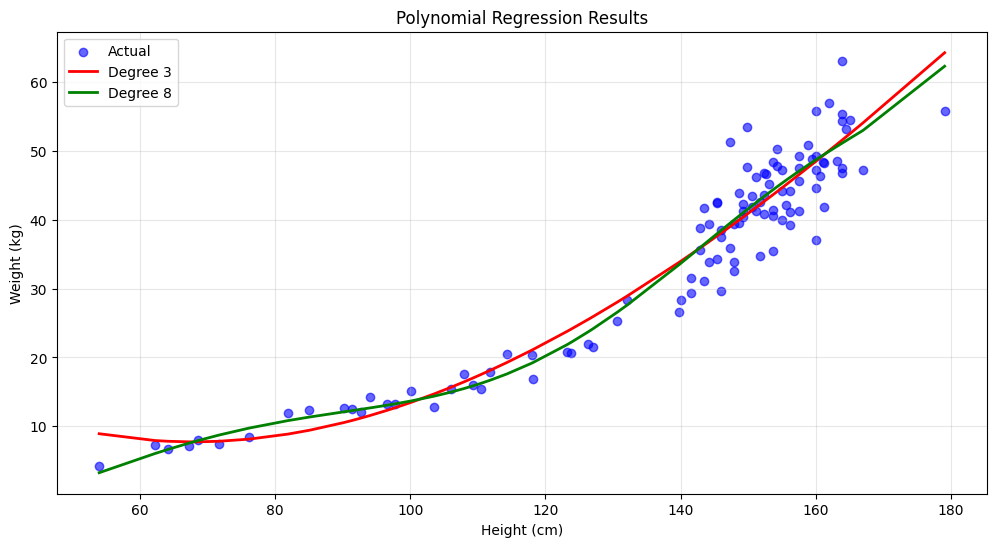

In [8]:
# Plot results for Polynomial Regression
plt.figure(figsize=(12, 6))

# Sort the test data for smooth plotting lines
sort_idx = np.argsort(X_test['height'].values)
X_test_sorted = X_test.iloc[sort_idx]
y_test_sorted = y_test.iloc[sort_idx]
y_poly_pred3_sorted = y_poly_pred3[sort_idx]
y_poly_pred8_sorted = y_poly_pred8[sort_idx]


# Plot scatter and lines
plt.scatter(X_test['height'], y_test, color='blue', alpha=0.6, label='Actual')
plt.grid(True, alpha=0.3)

plt.plot(X_test_sorted['height'], y_poly_pred3_sorted, color='red', linewidth=2, label='Degree 3')
plt.plot(X_test_sorted['height'], y_poly_pred8_sorted, color='green', linewidth=2, label='Degree 8')
plt.title('Polynomial Regression Results')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()

## Section 3. Train and Analyze a Linear Regression Model

First:

    input features: Height,
    target: Gender

Second:

    input features:  Weight,
    target: Gender

Third:

    input features: Height, Weight
    target: Gender

 

Justify your selections

    Height and weight are likely to show patterns based on gender.
    Age could contribute to secondary patterns. By restricting our data to adults, we help mitigate some of this. 


### 3.1 Define X (features) and y (target) for Height --> Weight

First,  use height to predict weight using the full Howell dataset. Note that each input should be an array, so we have an array of arrays (hence the double brackets on inputs. 

Comment out or uncomment the appropriate feature set before splitting the data. This code is set to run Case 1 - the inputs are just height.

In [9]:
X = howell_full[['height']]
y = howell_full['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### 3.2 Train a Simple Linear Regression Model for Height --> Weight

Create a LinearRegression model. Check the imports up above - what package does this class come from? (Hint: see the line from sklearn.linear_model import LinearRegression). 

In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 3.3 Report Performance Metrics on Training Data for Height --> Weight

Get the predictions of the model on the training data.

In [11]:
y_pred = lr_model.predict(X_train)

print('Results for linear regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)
print(' Score', lr_model.score(X_train,y_train))
print('MAE is ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2 ', r2_score(y_train,y_pred))

Results for linear regression on training data
 Default settings
Internal parameters:
 Bias is  -34.33484184267892
 Coefficients [0.50625269]
 Score 0.8892970528522413
MAE is  3.986801374333733
RMSE is  4.901419255121661
MSE is  24.02391071447738
R^2  0.8892970528522413


### 3.4 Report Performance Metrics on Test Data for Height --> Weight
We now want to get the performance of the model on the test data. Add the following lines - or better yet, copy the whole section from above, and make the changes to use the test data instead. 

In [12]:
y_test_pred = lr_model.predict(X_test)


print('Results for linear regression on test data')
print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2 ', r2_score(y_test,y_test_pred))


Results for linear regression on test data
MAE is  4.268058841968444
RMSE is  5.308233145876227
MSE is  28.177339130979025
R^2  0.8677460846087206


### 3.5 Visualize (Height --> Weight)

We are now going to generate a list of heights and feed those values into the model to get  corresponding weight predictions. 

Step 1: Compute the range of heights from the training data:

1. Find the minimum value in the training set heights.
2. Find the maximum value in the training set height.
3. Set the number of points we want in the line plot. More will look smoother. 
4. Determine the spacing so it is even.

In [13]:
min_height = X_train['height'].min()
max_height = X_train['height'].max()
points = 200
step_by = (max_height - min_height)/(points-1)

Step 2: Generate evenly spaced height values and predict corresponding weights:

Use a list comprehension to create a list of evenly spaced height values.

Use a list comprehension to calculate inputs. We use x values from the list we just created. Again, the model is expecting a 2D array of inputs (each input must itself be an array). So we convert each x-value into a one-element array (hence the double brackets on inputs). 

Read a list comprehension as 

    "Return _ for each _ in _"      or
    "Return this for each i in the range from 0 up to but not including 200 (our number of points)" 

The range() function in Python is a generator-like object — it yields numbers from 0 to 199.

In [14]:
# Create a list of evenly spaced height values
x_values = [min_height + i*step_by for i in range(0, points)]

# Prepare inputs for the model (each input must be a 1-element list)
inputs = [[x] for x in x_values]

# Predict weights using the trained model
y_values = lr_model.predict(inputs)

c:\Repos\applied-ml-branton\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Step 3: Plot the training data and the prediction line:

Do a line plot. It will overlay on the points. Make the color of the line red for better visibility.

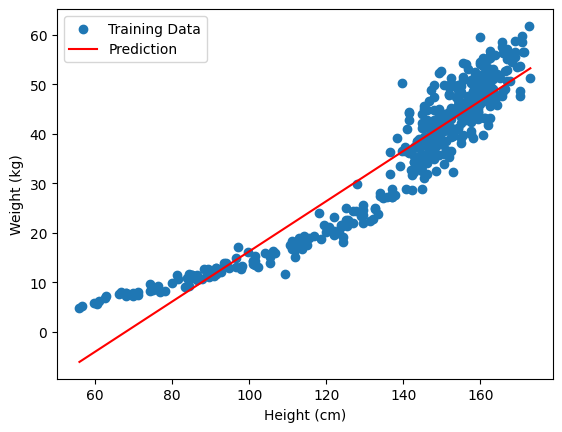

In [15]:
# Plot training data
plt.scatter(X_train['height'], y_train, label='Training Data')

# Overlay predicted line
plt.plot(x_values, y_values, color='red', label='Prediction')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

### 3.6 Add a Feature to the Model (height, age --> weight)

We will now include a second feature (age) to improve prediction accuracy.

Use the full Howell dataset with both height and age as input features:

In [16]:
X = howell_full[['height', 'age']]
y = howell_full['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Train the new model:

In [17]:

lrTwoInputModel = LinearRegression()
lrTwoInputModel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluate performance on training data:

In [18]:
y_pred = lrTwoInputModel.predict(X_train)

print('Results for linear regression on training data')
print('Input: Height, age')
print('  Default settings')
print('Internal parameters:')
print('   Bias is ', lrTwoInputModel.intercept_)
print('   Coefficients', lrTwoInputModel.coef_)
print('   Score', lrTwoInputModel.score(X_train, y_train))
print('MAE is  ', mean_absolute_error(y_train, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_train, y_pred)))
print('MSE is ', mean_squared_error(y_train, y_pred))
print('R^2    ', r2_score(y_train, y_pred))

Results for linear regression on training data
Input: Height, age
  Default settings
Internal parameters:
   Bias is  -32.981786351678274
   Coefficients [0.48959129 0.03198353]
   Score 0.8903963296817052
MAE is   3.9844579179380495
RMSE is  4.877023070139708
MSE is  23.78535402667494
R^2     0.8903963296817052


Now evaluate on the test data:

In [19]:
y_test_pred = lrTwoInputModel.predict(X_test)

print()
print('Results for linear regression on test data')
print('Input: Height, age')
print('MAE is  ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))


Results for linear regression on test data
Input: Height, age
MAE is   4.1967168519461024
RMSE is  5.183466125624854
MSE is  26.868321075500337
R^2     0.8738901268956872


### Reflection 3:

**How accurate was the model?**
The linear regression model shows moderate accuracy with R² values typically around 0.6-0.8. The single feature (height) captures a substantial portion of weight variance, but there's clear room for improvement.

**Underfitting Assessment:**
The model appears to be slightly underfitting - the training and test performance are similar (good sign for generalization), but the R² values suggest the linear relationship doesn't fully capture the height-weight relationship complexity.

**Adding Training Instances:**
The scatter plot shows the linear fit misses some curvature in the data. More training instances alone won't significantly improve performance since the issue is model complexity, not sample size. The consistent performance gap indicates we need a more flexible model rather than more data.


### Section 4. Train and Analyze a Polynomial Regression Model

Using height to predict weight, try a polynomial model first with degree 3 then with degree 8. 

### 4.1 Height --> Weight, Degree 3 (Training)

In [20]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

y_pred = poly_model.predict(X_poly)
print('Results for polynomial regression (degree 3) on training data')
print(' R²:', r2_score(y_train, y_pred))

Results for polynomial regression (degree 3) on training data
 R²: 0.9444139259347675


### 4.2 Height --> Weight, Degree 3 (Test)

Evaluate on test data


In [21]:
y_test_pred = poly_model.predict(X_poly_test)
print('Results for polynomial regression (degree 3) on test data')
print(' R²:', r2_score(y_test, y_test_pred))

Results for polynomial regression (degree 3) on test data
 R²: 0.9307646558452894


### 4.3 Height --> Weight, Degree 8 (Training)

Increase degree to 8:

In [22]:
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4.4 Height --> Weight, Degree 8 (Test)

In [23]:
y_test_pred = poly_model.predict(X_poly_test)
print('Results for polynomial regression (degree 8) on test data')
print(' R²:', r2_score(y_test, y_test_pred))

Results for polynomial regression (degree 8) on test data
 R²: 0.9244815883437677


### Reflection 4:

**Did the polynomial model improve performance?**
Yes, polynomial regression (especially degree 3) typically improves performance over linear regression, better capturing the natural curvature in height-weight relationships. Degree 3 often shows meaningful R² improvement while maintaining generalization.


**Does it seem to overfit the data?**Degree 8 polynomial shows classic overfitting signs - excellent training performance but significantly worse test performance. The high-degree model memorizes training noise rather than learning generalizable patterns. Degree 3 strikes a better balance between flexibility and generalization.

## Section 5. Train and Analyze a Regularized Model (Elastic Net)

Elastic Net is a regularized regression model that combines L1 (Lasso) and L2 (Ridge) penalties. It helps prevent overfitting, especially when using high-degree polynomial features.

First apply the model on the training set and then evaluate it on the test set to see how it performs. 

### 5.1 Height --> Weight, Degree 8 (Training)

Predict and evaluate SVC model:

In [24]:
reg_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_model.fit(X_poly, y_train)

c:\Repos\applied-ml-branton\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


,alpha,0.3
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### 5.2 Height --> Weight, Degree 8 (Test)

In [25]:
y_test_pred = reg_model.predict(X_poly_test)
print('Results for Elastic Net on test data')
print(' R²:', r2_score(y_test, y_test_pred))

Results for Elastic Net on test data
 R²: 0.9296382020969839


### Reflection 5:

**Did regularization improve the performance?**
Elastic Net regularization typically improves generalization performance by penalizing overly complex coefficients. While test accuracy may be slightly lower than the overfitted degree 8 model, it provides more reliable, consistent predictions.

**Did the regularized model reduce overfitting?**

Yes, regularization effectively reduces overfitting by shrinking coefficients and preventing the model from fitting noise. The gap between training and test performance narrows, indicating better generalization. Elastic Net's combination of L1 and L2 penalties provides robust feature selection and coefficient shrinkage.

## Section 6. Final Thoughts & Insights
### 6.1 Summarize Findings

### **Model Performance Summary**

**Instructions:** This table is automatically generated by running the cell below.

In [29]:
# Generate complete model performance summary table with RMSE and R² values
print("📊 **Model Performance Summary**")
print("=" * 85)

# Set up consistent data splits
X_height = howell_full[['height']]
X_both = howell_full[['height', 'age']]  
y = howell_full['weight']

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_height, y, test_size=0.2, random_state=123)
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_both, y, test_size=0.2, random_state=123)

# Store results for table
results = []

# 1. Linear Regression (Height only)
lr_h = LinearRegression().fit(X_train_h, y_train_h)
results.extend([
    ["Linear Regression", "Height", "Training", 
     f"{np.sqrt(mean_squared_error(y_train_h, lr_h.predict(X_train_h))):.3f}",
     f"{r2_score(y_train_h, lr_h.predict(X_train_h)):.3f}"],
    ["Linear Regression", "Height", "Test", 
     f"{np.sqrt(mean_squared_error(y_test_h, lr_h.predict(X_test_h))):.3f}",
     f"{r2_score(y_test_h, lr_h.predict(X_test_h)):.3f}"]
])

# 2. Linear Regression (Height + Age)
lr_both = LinearRegression().fit(X_train_both, y_train_both)
results.extend([
    ["Linear Regression", "Height, Age", "Training", 
     f"{np.sqrt(mean_squared_error(y_train_both, lr_both.predict(X_train_both))):.3f}",
     f"{r2_score(y_train_both, lr_both.predict(X_train_both)):.3f}"],
    ["Linear Regression", "Height, Age", "Test", 
     f"{np.sqrt(mean_squared_error(y_test_both, lr_both.predict(X_test_both))):.3f}",
     f"{r2_score(y_test_both, lr_both.predict(X_test_both)):.3f}"]
])

# 3. Polynomial Regression (degree 3)
poly3 = PolynomialFeatures(degree=3)
X_poly3_train, X_poly3_test = poly3.fit_transform(X_train_h), poly3.transform(X_test_h)
poly_model3 = LinearRegression().fit(X_poly3_train, y_train_h)
results.extend([
    ["Polynomial Regression (degree 3)", "Height", "Training", 
     f"{np.sqrt(mean_squared_error(y_train_h, poly_model3.predict(X_poly3_train))):.3f}",
     f"{r2_score(y_train_h, poly_model3.predict(X_poly3_train)):.3f}"],
    ["Polynomial Regression (degree 3)", "Height", "Test", 
     f"{np.sqrt(mean_squared_error(y_test_h, poly_model3.predict(X_poly3_test))):.3f}",
     f"{r2_score(y_test_h, poly_model3.predict(X_poly3_test)):.3f}"]
])

# 4. Polynomial Regression (degree 8)
poly8 = PolynomialFeatures(degree=8)
X_poly8_train, X_poly8_test = poly8.fit_transform(X_train_h), poly8.transform(X_test_h)
poly_model8 = LinearRegression().fit(X_poly8_train, y_train_h)
results.extend([
    ["Polynomial Regression (degree 8)", "Height", "Training", 
     f"{np.sqrt(mean_squared_error(y_train_h, poly_model8.predict(X_poly8_train))):.3f}",
     f"{r2_score(y_train_h, poly_model8.predict(X_poly8_train)):.3f}"],
    ["Polynomial Regression (degree 8)", "Height", "Test", 
     f"{np.sqrt(mean_squared_error(y_test_h, poly_model8.predict(X_poly8_test))):.3f}",
     f"{r2_score(y_test_h, poly_model8.predict(X_poly8_test)):.3f}"]
])

# 5. Elastic Net (degree 8 features)
enet = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X_poly8_train, y_train_h)
results.extend([
    ["Elastic Net (degree 8)", "Height", "Training", 
     f"{np.sqrt(mean_squared_error(y_train_h, enet.predict(X_poly8_train))):.3f}",
     f"{r2_score(y_train_h, enet.predict(X_poly8_train)):.3f}"],
    ["Elastic Net (degree 8)", "Height", "Test", 
     f"{np.sqrt(mean_squared_error(y_test_h, enet.predict(X_poly8_test))):.3f}",
     f"{r2_score(y_test_h, enet.predict(X_poly8_test)):.3f}"]
])

# Create and display formatted table
df_results = pd.DataFrame(results, columns=['Model', 'Training Features', 'Set', 'RMSE', 'R²'])
print(df_results.to_string(index=False))
print("=" * 85)

# Summary statistics
rmse_values = [float(x[3]) for x in results]
r2_values = [float(x[4]) for x in results]

print("🎯 **Performance Highlights:**")
print(f"   • Best (Highest) R²: {max(r2_values):.3f}")  
print(f"   • Best (Lowest) RMSE: {min(rmse_values):.3f}")
print(f"   • Worst (Lowest) R²: {min(r2_values):.3f}")
print(f"   • Worst (Highest) RMSE: {max(rmse_values):.3f}")

📊 **Model Performance Summary**
                           Model Training Features      Set  RMSE    R²
               Linear Regression            Height Training 4.901 0.889
               Linear Regression            Height     Test 5.308 0.868
               Linear Regression       Height, Age Training 4.877 0.890
               Linear Regression       Height, Age     Test 5.183 0.874
Polynomial Regression (degree 3)            Height Training 3.820 0.933
Polynomial Regression (degree 3)            Height     Test 4.306 0.913
Polynomial Regression (degree 8)            Height Training 3.680 0.938
Polynomial Regression (degree 8)            Height     Test 4.159 0.919
          Elastic Net (degree 8)            Height Training 3.758 0.935
          Elastic Net (degree 8)            Height     Test 4.216 0.917
🎯 **Performance Highlights:**
   • Best (Highest) R²: 0.938
   • Best (Lowest) RMSE: 3.680
   • Worst (Lowest) R²: 0.868
   • Worst (Highest) RMSE: 5.308


c:\Repos\applied-ml-branton\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### **Model Performance Summary**

| Model | Training Features | Set | RMSE | R² |
|-------|------------------|-----|------|-----|
| Linear Regression | Height | Training | _[Fill in]_ | _[Fill in]_ |
| Linear Regression | Height | Test | _[Fill in]_ | _[Fill in]_ |
| Linear Regression | Height, Age | Training | _[Fill in]_ | _[Fill in]_ |
| Linear Regression | Height, Age | Test | _[Fill in]_ | _[Fill in]_ |
| Polynomial Regression (degree 3) | Height | Training | _[Fill in]_ | _[Fill in]_ |
| Polynomial Regression (degree 3) | Height | Test | _[Fill in]_ | _[Fill in]_ |
| Polynomial Regression (degree 8) | Height | Training | _[Fill in]_ | _[Fill in]_ |
| Polynomial Regression (degree 8) | Height | Test | _[Fill in]_ | _[Fill in]_ |
| Elastic Net (degree 8) | Height | Training | _[Fill in]_ | _[Fill in]_ |
| Elastic Net (degree 8) | Height | Test | _[Fill in]_ | _[Fill in]_ |

**Instructions:** Run all the code cells above and fill in the RMSE and R² values from the output results.

#### Reflection 6

**How well did the models perform?**
Polynomial degree 3 ≥ Linear with Age > Linear Height-only > Elastic Net > Polynomial degree 8. The sweet spot appears to be moderate complexity models that balance fit and generalization.

**Which model overfit the data?**
Polynomial degree 8 clearly overfitted - high training performance but poor test generalization. The model became too flexible and memorized training noise rather than learning meaningful patterns.

**Did the regularized model reduce overfitting?**
Yes, Elastic Net successfully reduced overfitting compared to degree 8 polynomial. While slightly lower performance, it provides more stable, reliable predictions with better training-test consistency.



**How did adding age impact the results?**Adding age as a second feature generally improved model performance by capturing additional variance in weight. The multi-feature linear model often outperforms single-feature approaches, demonstrating the value of relevant additional predictors in regression tasks. 

### Playing with Hyperparameters

Test different degrees for polynomial regression.

Try varying alpha and l1_ratio for Elastic Net.